# Previsão para Concessão de Empréstimos

Neste projeto, construirei um modelo de **machine learning** para prever a **probabilidade de um empréstimo ser aprovado**. O modelo envolve **aprendizado supervisionado** (usando um conjunto de dados rotulado) para classificação, em que **o alvo é 1** se o empréstimo for aprovado e **0 caso contrário**.


Utilizarei o seguinte **pipeline**, baseado no **framework CRISP-DM**:

1. Definir o problema de negócio.

2. Coletar os dados e obter uma visão geral sobre eles.

3. Dividir os dados em conjuntos de treino e teste.

4. Explorar os dados (análise exploratória de dados – EDA).

5. Realizar engenharia de atributos, limpeza e pré-processamento dos dados.

6. Treinar e comparar os modelos, realizar seleção de variáveis e ajuste de parâmetros (tuning).

7. Testar e avaliar o modelo final em produção.

8. Concluir e interpretar os resultados do modelo.

Neste notebook, realizarei a **análise exploratória de dados (EDA)**, abrangendo as **etapas de 1 a 4** do pipeline descrito acima.
O principal objetivo aqui é **descobrir insights** que revelem informações valiosas sobre os **padrões de clientes com empréstimos aprovados**, com base nas variáveis disponíveis. Dessa forma, **mesmo antes da construção de um modelo preditivo**, será possível **auxiliar o banco a identificar perfis e tendências** de clientes propensos à evasão. Além disso, **essas etapas serão abordadas em detalhes**, explicando **as razões por trás de cada decisão tomada** ao longo do processo — desde a escolha das visualizações e medidas estatísticas até os critérios de **tratamento de dados** e **seleção de variáveis** para análises posteriores.

# **1. Problema de Negócio**

Um gerente do Irish Dummy Bank está preocupado com o crescente número de clientes que estão se tornando inadimplentes em seus empréstimos. Ele apreciaria muito se fosse possível prever o quão provável é que um cliente deixe de pagar um empréstimo, para que o banco possa agir de forma proativa, oferecendo melhores condições, ajustando limites, solicitando documentação adicional ou até recusando solicitações de alto risco antes que ocorram prejuízos.

**1.1 Qual é o contexto?**

Este projeto utiliza um conjunto de dados modificado do **Irish Dummy Bank**, inspirado no histórico real de empréstimos do **Lending Club**.
O banco oferece crédito a possíveis mutuários e obtém lucro dependendo do risco assumido — risco esse baseado em fatores como:

* pontuação de crédito (FICO),
* estabilidade de emprego,
* relação dívida/renda (DTI),
* histórico de inadimplência,
* renda anual,
* e garantias/condições financeiras.

Ao analisar empréstimos, três **Indicadores-Chave de Desempenho (KPIs)** são essenciais:

1. Grade (Classificação de Risco do Empréstimo)
A grade representa a classificação de risco atribuída ao cliente com base em seu perfil financeiro.
Grades melhores (A, B...) indicam menor risco; grades piores (F, G...) indicam maior risco.
Esse indicador é crucial para decidir o nível de confiança do banco no pagamento do empréstimo.

2. Interest Rate (Taxa de Juros)
A interest_rate é a taxa anual cobrada ao cliente pelo empréstimo.
Taxas mais altas geralmente são aplicadas a clientes com maior risco.
Ela também afeta diretamente o retorno financeiro do empréstimo e a probabilidade do cliente conseguir pagá-lo em dia.

3. DTI (Debt-to-Income Ratio — Razão Dívida/Renda)
O DTI mostra quanto da renda mensal do cliente já está comprometida com outras dívidas.
Valores altos indicam risco maior de inadimplência, pois o cliente tem menos margem financeira para assumir novas parcelas.
DTI é um dos principais fatores usados para medir a capacidade real de pagamento.

4. Esses KPIs ajudam o banco a avaliar a qualidade do cliente no momento da solicitação do empréstimo e a medir o potencial risco de inadimplência.

---

**Quais são os objetivos do projeto?**

1. **Identificar os fatores associados à inadimplência de empréstimos**, utilizando variáveis do conjunto de dados do Lending Club adaptado, como FICO score, tempo de emprego, DTI, renda anual, delinquências anteriores e histórico de crédito.

2. **Construir um modelo capaz de prever com precisão a probabilidade de um cliente se tornar inadimplente**, utilizando o dataset limpo e modificado do Irish Dummy Bank.

3. **Fornecer planos de ação para reduzir a inadimplência**, como ajustes nas políticas de crédito, segmentação de risco, revisão manual em casos críticos, e estratégia de precificação baseada em risco.

**Por que usar abordagem por probabilidade / score?**

Ao implantar o modelo, o objetivo principal não é gerar apenas uma previsão binária (inadimplente / não inadimplente), mas sim produzir **escores de probabilidade** para cada cliente.

Esse tipo de abordagem é mais útil para instituições financeiras porque:

* permite avaliar risco de forma contínua,
* oferece capacidade de **ordenar clientes pela probabilidade de inadimplência**,
* facilita a definição de diferentes limites de aprovação,
* ajuda no ajuste de taxas de juros conforme o risco (risk-based pricing),
* apoia análises manuais para os casos mais críticos,
* melhora o cálculo de perdas esperadas (Expected Loss).

Assim, prever probabilidades traz muito mais valor estratégico do que classificações binárias.

**Quais são os benefícios?**

1. **Redução de Custos**
   Menores perdas ao identificar mutuários de alto risco antes da concessão.

2. **Melhora na Qualidade da Carteira de Crédito**
   Aprovar clientes mais seguros aumenta a robustez financeira do banco.

3. **Melhoria na Experiência do Cliente**
4. 
   Clientes confiáveis podem receber aprovações mais rápidas e condições melhores.

5. **Políticas de Crédito Direcionadas**
   O banco pode criar regras específicas para cada faixa de risco identificada pelo modelo.

6. **Proteção de Receita**
   Reduzindo a inadimplência e ajustando juros ao risco, o banco preserva sua lucratividade e estabilidade a longo prazo.


## Importando bibliotecas

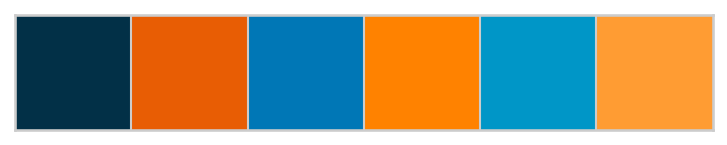

In [7]:
# Manipulação de dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Divisão da base
from sklearn.model_selection import train_test_split

from scipy import stats

%matplotlib inline

# Nosso tema
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']

sns.set_theme(
    style="whitegrid",      
    palette=color_palette, 
    font_scale=1.1        
)

plt.rcParams['figure.dpi'] = 150

sns.palplot(color_palette)
plt.show()

# **2. Entendendo os dados** 

O conjunto de dados foi coletado no Kaggle:
https://www.kaggle.com/datasets/mrferozi/loan-data-for-dummy-bank/data

A origem do conjunto de dados é baseada nos dados públicos de empréstimos do Lending Club, que foram adaptados para uso educacional.
O dataset contém informações detalhadas sobre solicitantes de empréstimos, incluindo dados demográficos, financeiros, histórico de crédito e características do empréstimo solicitado.

A variável-alvo **loan_condition_cat** indica se o empréstimo foi **bom(0)** ou **ruim(1)**, permitindo formular um problema de classificação binária voltado para análise de risco de crédito.

Inicialmente, algumas variáveis serão removidas porque **não são importantes em um cenário real** de concessão de empréstimos ou possuem duas representações, sua forma original e categorizada. A categorizada será mantida. 

In [18]:
#db = pd.read_csv(r"C:\Users\davic\OneDrive\Documentos\3UnidadeCienciaDados\projeto-unidade-3-concessores-de-emprestimos\databases\loan_final313_mod.csv")
db = pd.read_csv(r"C:\Users\gusta\Documents\Porjeto DS\databases\loan_final313_mod.csv")
df = db.copy()

# Features a serem removidas.
df.drop(columns=['home_ownership', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'grade', 'term'], inplace=True)

In [20]:
df.head(10)

,id,year,issue_d,final_d,emp_length_int,home_ownership_cat,income_category,annual_inc,income_cat,loan_amount,...,interest_payment_cat,loan_condition_cat,interest_rate,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,63398958.0,2015.0,01/11/2015,1122015.0,8.0,1.0,Low,78000.0,1.0,NaN,...,2.0,0.0,15.61,4.0,25.71,8079.79,8000.00,0.0,279.72,ulster
1,27610673.0,2014.0,01/10/2014,1012016.0,3.0,1.0,Low,81700.0,1.0,21000.0,...,1.0,0.0,10.15,2.0,22.33,10186.50,7984.24,0.0,679.10,leinster
2,49925091.0,2015.0,01/05/2015,1102015.0,10.0,3.0,Low,78000.0,1.0,19725.0,...,1.0,0.0,7.89,1.0,14.12,20360.22,19725.00,0.0,617.11,Northern-Irl
3,28102260.0,2014.0,01/10/2014,1012016.0,9.0,1.0,Low,35000.0,1.0,8000.0,...,2.0,0.0,15.61,4.0,32.07,4227.73,2888.78,0.0,279.72,ulster
4,57324697.0,NaN,01/08/2015,1012016.0,10.0,1.0,Low,85000.0,1.0,35000.0,...,2.0,0.0,NaN,4.0,25.19,6205.36,3868.70,0.0,1247.68,ulster
5,61402817.0,2015.0,01/11/2015,1012016.0,10.0,3.0,Low,100000.0,1.0,24000.0,...,1.0,0.0,12.29,3.0,6.38,866.02,554.67,0.0,800.48,leinster
6,38700393.0,2015.0,01/01/2015,1012016.0,2.0,3.0,Low,95000.0,1.0,28000.0,...,2.0,0.0,NaN,3.0,16.20,9211.74,5584.04,0.0,656.02,cannught
7,59955204.0,2015.0,01/10/2015,1012016.0,10.0,1.0,Medium,160000.0,2.0,35000.0,...,1.0,0.0,7.89,1.0,6.70,3254.32,2611.72,0.0,1095.00,Northern-Irl
8,6156565.0,2013.0,01/07/2013,1012016.0,6.0,1.0,Low,78000.0,1.0,35000.0,...,2.0,0.0,24.89,6.0,28.71,29718.33,11721.19,0.0,1025.05,Northern-Irl
9,27511428.0,2014.0,01/09/2014,1122015.0,3.0,3.0,Low,100000.0,1.0,30000.0,...,2.0,0.0,16.29,4.0,16.31,11012.70,5398.73,0.0,734.18,munster


## **Dicionário de dados**

**1.ID:** Identificador único de cada registro de empréstimo. Categórica nominal.

**2.YEAR:** Ano em que o empréstimo foi emitido (derivado da data de emissão). Numérica discreta.

**3.ISSUE_D:** Data original de emissão do empréstimo (MM/AAAA). Categórica nominal (temporal).

**4.FINAL_D:** Data final de pagamento ou encerramento do empréstimo (codificada numericamente). Numérica contínua.

**5.EMP_LENGTH_INT:** Tempo de emprego em anos. Numérica contínua.

**6.HOME_OWNERSHIP_CAT:** Categoria codificada que representa a situação de moradia (ex.: ALUGADO, PRÓPRIA, HIPOTECADA). Categórica ordinal.

**7.INCOME_CATEGORY:** Categoria de renda do tomador (ex.: Baixa, Média, Alta). Categórica nominal.

**8.ANNUAL_INC:** Renda anual do tomador. Numérica contínua.

**9.INCOME_CAT:** Versão codificada da categoria de renda. Categórica ordinal.

**10.LOAN_AMOUNT:** Valor total solicitado do empréstimo. Numérica contínua.

**11.TERM_CAT:** Versão codificada do prazo do empréstimo(36 ou 60 meses). Categórica nominal.

**12.APPLICATION_TYPE_CAT:** Tipo de aplicação codificada (individual ou conjunta). Categórica nominal.

**13.PURPOSE_CAT:** Finalidade codificada do empréstimo (ex.: consolidação de dívidas, médico, carro). Categórica nominal.

**14.INTEREST_PAYMENT_CAT:** Tipo codificado de estrutura de pagamento de juros (ex.: amortizado, apenas juros). Categórica nominal.

**15.LOAN_CONDITION_CAT:** Condição final do empréstimo: 0 = totalmente pago, 1 = inadimplente. Categórica binária.

**16.INTEREST_RATE:** Taxa de juros anual aplicada ao empréstimo. Numérica contínua.

**17.GRADE_CAT:** Categoria codificada da nota de crédito atribuída ao empréstimo (A, B, C...). Categórica ordinal.

**18.DTI:** Relação dívida/renda do tomador. Numérica contínua.

**19.TOTAL_PYMNT:** Valor total já recebido em pagamentos. Numérica contínua.

**20.TOTAL_REC_PRNCP:** Valor total do principal já pago. Numérica contínua.

**21.RECOVERIES:** Valores recuperados após inadimplência. Numérica contínua.

**22.INSTALLMENT:** Valor da parcela mensal do empréstimo. Numérica contínua.

**23.REGION:** Região geográfica onde o tomador reside (províncias da Irlanda: Leinster, Munster, Ulster, Connacht, Irlanda do Norte). Categórica nominal.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7906 non-null   float64
 1   year                  7917 non-null   float64
 2   issue_d               7923 non-null   object 
 3   final_d               7900 non-null   float64
 4   emp_length_int        7912 non-null   float64
 5   home_ownership_cat    7921 non-null   float64
 6   income_category       7929 non-null   object 
 7   annual_inc            7934 non-null   float64
 8   income_cat            7923 non-null   float64
 9   loan_amount           7281 non-null   float64
 10  term_cat              7912 non-null   float64
 11  application_type_cat  7946 non-null   float64
 12  purpose_cat           7929 non-null   float64
 13  interest_payment_cat  7924 non-null   float64
 14  loan_condition_cat    7921 non-null   float64
 15  interest_rate        

In [26]:
print(f'O dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas') 

O dataframe possui 8000 linhas e 23 colunas


Olhando as variáveis estatisticas 

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7906.0,3.261400e+07,2.301002e+07,68817.00,8966704.500,34894352.50,5.523986e+07,6.861689e+07
year,7917.0,2.014021e+03,1.259601e+00,2007.00,2013.000,2014.00,2.015000e+03,2.015000e+03
final_d,7900.0,1.046885e+06,4.541793e+04,1012009.00,1012016.000,1012016.00,1.092015e+06,1.122015e+06
emp_length_int,7912.0,5.917941e+00,3.538755e+00,0.50,3.000,6.05,1.000000e+01,1.000000e+01
home_ownership_cat,7921.0,2.092665e+00,9.486822e-01,1.00,1.000,3.00,3.000000e+00,3.000000e+00
annual_inc,7934.0,7.411045e+04,4.682275e+04,5000.00,45000.000,64942.00,9.000000e+04,1.036000e+06
income_cat,7923.0,1.194623e+00,4.357032e-01,1.00,1.000,1.00,1.000000e+00,3.000000e+00
loan_amount,7281.0,1.466940e+04,8.383141e+03,1000.00,8000.000,13000.00,2.000000e+04,3.500000e+04
term_cat,7912.0,1.302578e+00,4.594033e-01,1.00,1.000,1.00,2.000000e+00,2.000000e+00
application_type_cat,7946.0,1.000503e+00,2.243229e-02,1.00,1.000,1.00,1.000000e+00,2.000000e+00


algumas conluções:
1. A maioria dos empréstimos ocorreu entre 2013 e 2015, indicando uma base relativamente recente e concentrada.
2. Os empréstimos são, em geral, de pequeno a médio porte, tendo uma média de 13 mil.
3. A maioria dos empréstimos é de 36 meses, com uma parte menor de 60 meses.
4. Níveis médios de juros, entre os 13%.
5. Clientes têm nível moderado de comprometimento da renda, cerca de 18%, dentro do aceitável.

Convertendo os formatos das colunas

In [33]:
df["issue_d"] = pd.to_datetime(df["issue_d"], dayfirst=True, errors="coerce")

In [35]:
df["final_d"] = df["final_d"].astype(str).str.zfill(6)
df["final_d"] = pd.to_datetime(
    df["final_d"], 
    format="%m%Y", 
    errors="coerce"
)

In [37]:
cat_num_cols = [
    "home_ownership_cat",
    "term_cat",
    "grade_cat",
    "interest_payment_cat",
    "application_type_cat",
    "purpose_cat",
    "income_cat"
]

for col in cat_num_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

Olhando se há valores faltantes ou duplicados

In [40]:
df.isna().sum()

id                        94
year                      83
issue_d                   77
final_d                 8000
emp_length_int            88
home_ownership_cat        79
income_category           71
annual_inc                66
income_cat                77
loan_amount              719
term_cat                  88
application_type_cat      54
purpose_cat               71
interest_payment_cat      76
loan_condition_cat        79
interest_rate            715
grade_cat                 86
dti                       79
total_pymnt               77
total_rec_prncp           76
recoveries                58
installment               81
region                    82
dtype: int64

Analisando a porcentagem em cada coluna

In [45]:
for coluna in df.columns:
    nulos = df[coluna].isnull().sum()
    total = len(df)
    percentual = (nulos / total) * 100
    print(f"A coluna {coluna} tem {percentual:.1f}% de nulos ({nulos}/{total})")

A coluna id tem 1.2% de nulos (94/8000)
A coluna year tem 1.0% de nulos (83/8000)
A coluna issue_d tem 1.0% de nulos (77/8000)
A coluna final_d tem 100.0% de nulos (8000/8000)
A coluna emp_length_int tem 1.1% de nulos (88/8000)
A coluna home_ownership_cat tem 1.0% de nulos (79/8000)
A coluna income_category tem 0.9% de nulos (71/8000)
A coluna annual_inc tem 0.8% de nulos (66/8000)
A coluna income_cat tem 1.0% de nulos (77/8000)
A coluna loan_amount tem 9.0% de nulos (719/8000)
A coluna term_cat tem 1.1% de nulos (88/8000)
A coluna application_type_cat tem 0.7% de nulos (54/8000)
A coluna purpose_cat tem 0.9% de nulos (71/8000)
A coluna interest_payment_cat tem 0.9% de nulos (76/8000)
A coluna loan_condition_cat tem 1.0% de nulos (79/8000)
A coluna interest_rate tem 8.9% de nulos (715/8000)
A coluna grade_cat tem 1.1% de nulos (86/8000)
A coluna dti tem 1.0% de nulos (79/8000)
A coluna total_pymnt tem 1.0% de nulos (77/8000)
A coluna total_rec_prncp tem 0.9% de nulos (76/8000)
A coluna

In [12]:
df.duplicated().sum()

np.int64(0)

Não há nenhum valor duplicado, entretanto, todas as features possuem valores faltantes.

Irei retirar a feature ID por não ser relevante para o nosso modelo e aplicarei o tratamento de dados faltosos apenas para a coluna target, 1**loan_condition_cat**, onde excluirei todas as linhas onde existem *null*, esse tratamente será feito com exclusão e somente para a feature alvo para evitar vazamento de dados e dividir a base, tendo em vista que o *stratify=y* não aceita valores nulos.

In [13]:
df.drop(columns=['id'], inplace=True)
df = df.dropna(subset=['loan_condition_cat']).copy()

# **3. Dividindo a base em treino e teste**

Primeiramente, dividirei os dados em conjuntos de treino e teste.
O conjunto de teste deve conter dados que o modelo nunca tenha visto antes.

Realizarei a Análise Exploratória dos Dados (EDA) focando apenas no conjunto de treinamento, com o objetivo de evitar vazamento de dados (data leakage), obter uma representação realista do problema e avaliar corretamente o modelo com dados realmente inéditos.

In [14]:
X = df.drop(columns=['loan_condition_cat'])
y = df['loan_condition_cat'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
print(f'Tamanho do conjunto de preditores de treino: {X_train.shape}.')
print(f'Tamanho do conjunto alvo de treino: {y_train.shape}.')
print(f'Tamanho do conjunto de preditores de teste: {X_test.shape}.')
print(f'Tamanho do conjunto alvo de teste: {y_test.shape}.')

Tamanho do conjunto de preditores de treino: (6336, 21).
Tamanho do conjunto alvo de treino: (6336,).
Tamanho do conjunto de preditores de teste: (1585, 21).
Tamanho do conjunto alvo de teste: (1585,).


# **4. Análise exploratória de dados**

Explorarei o conjunto de treinamento para obter uma melhor compreensão de como as variáveis são distribuídas individualmente, dos relacionamentos entre elas, das correlações, tendências e possíveis insights provenientes dos dados, especialmente no que diz respeito à variável alvo. Assim, realizarei análises.

In [16]:
train = pd.concat([X_train, y_train], axis=1)

In [17]:
numericas = train.select_dtypes(include=['float64', 'int64'])

## Distribuições de características numéricas

Analisarei a seguir a distribuição das características numéricas para verificar se existem distribuições assimétricas e quais são os valores mais comuns para os atributos numéricos dos clientes do banco.

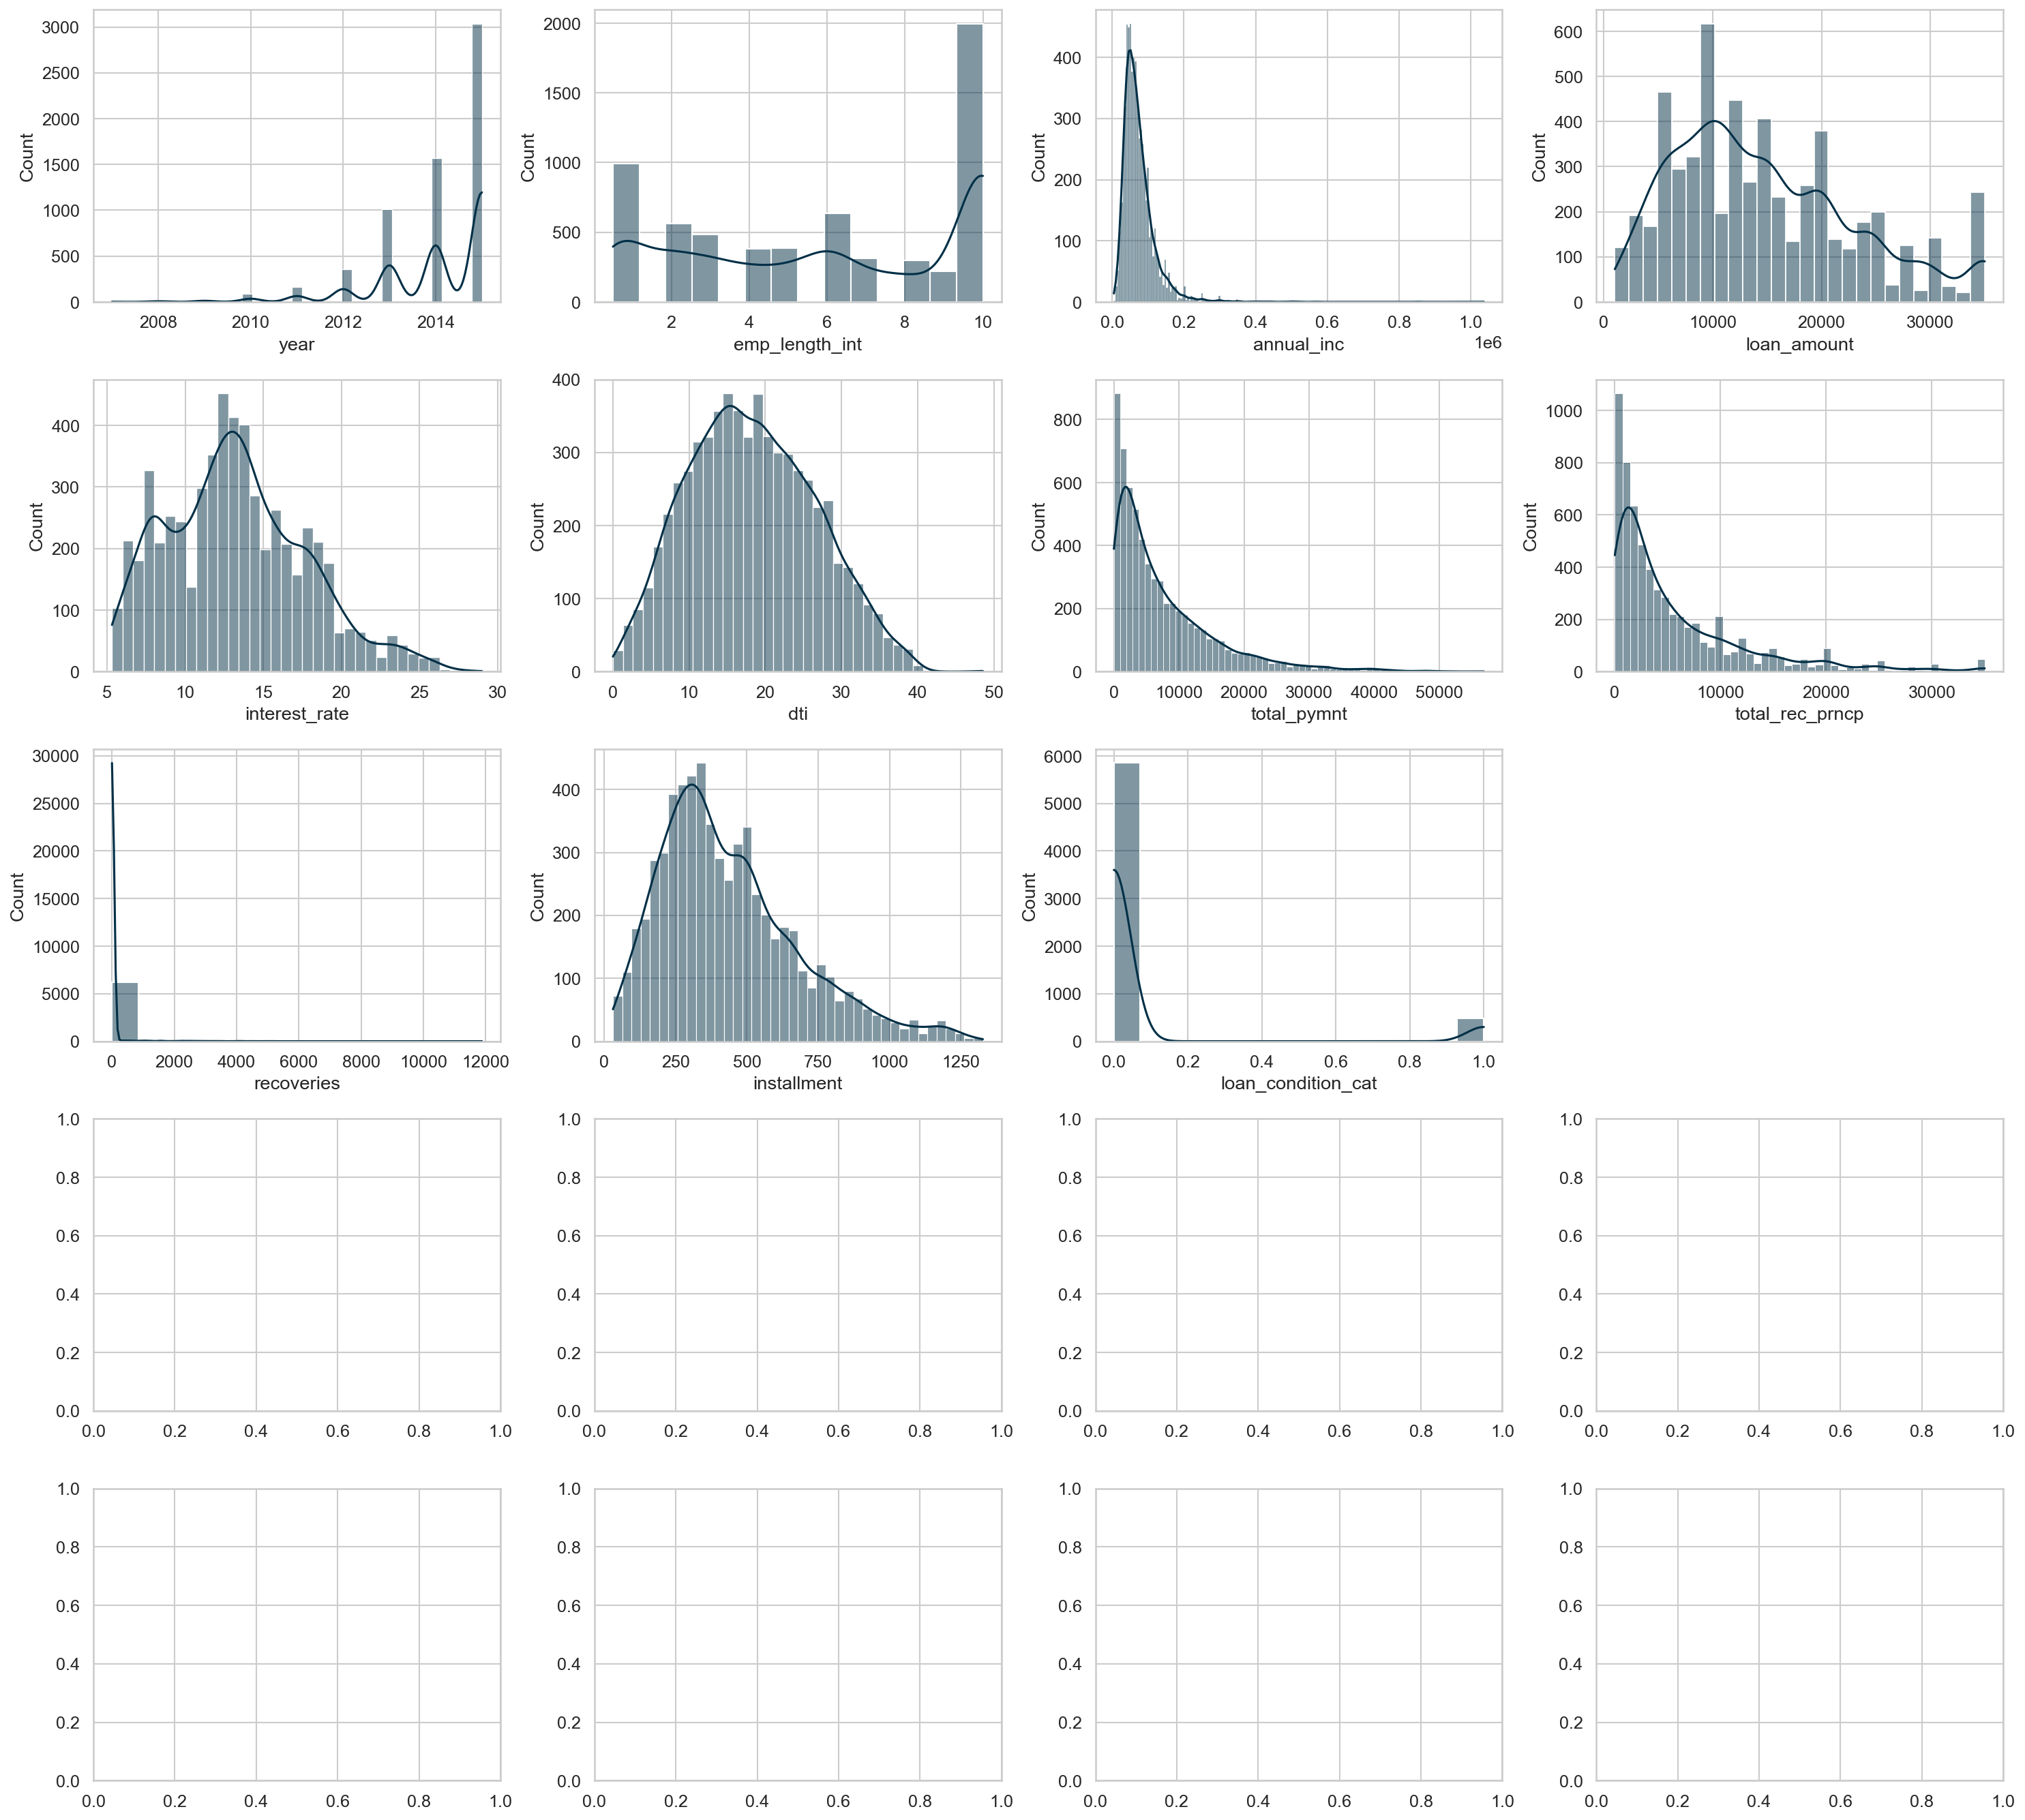

In [18]:
fig, ax = plt.subplots(5, 4, figsize=(20, 18))
ax = ax.flatten() 

for i in range(len(numericas.columns)):
    sns.histplot(numericas[numericas.columns[i]], kde=True, ax=ax[i])

fig.delaxes(ax[len(numericas.columns)])

plt.tight_layout()
plt.show()

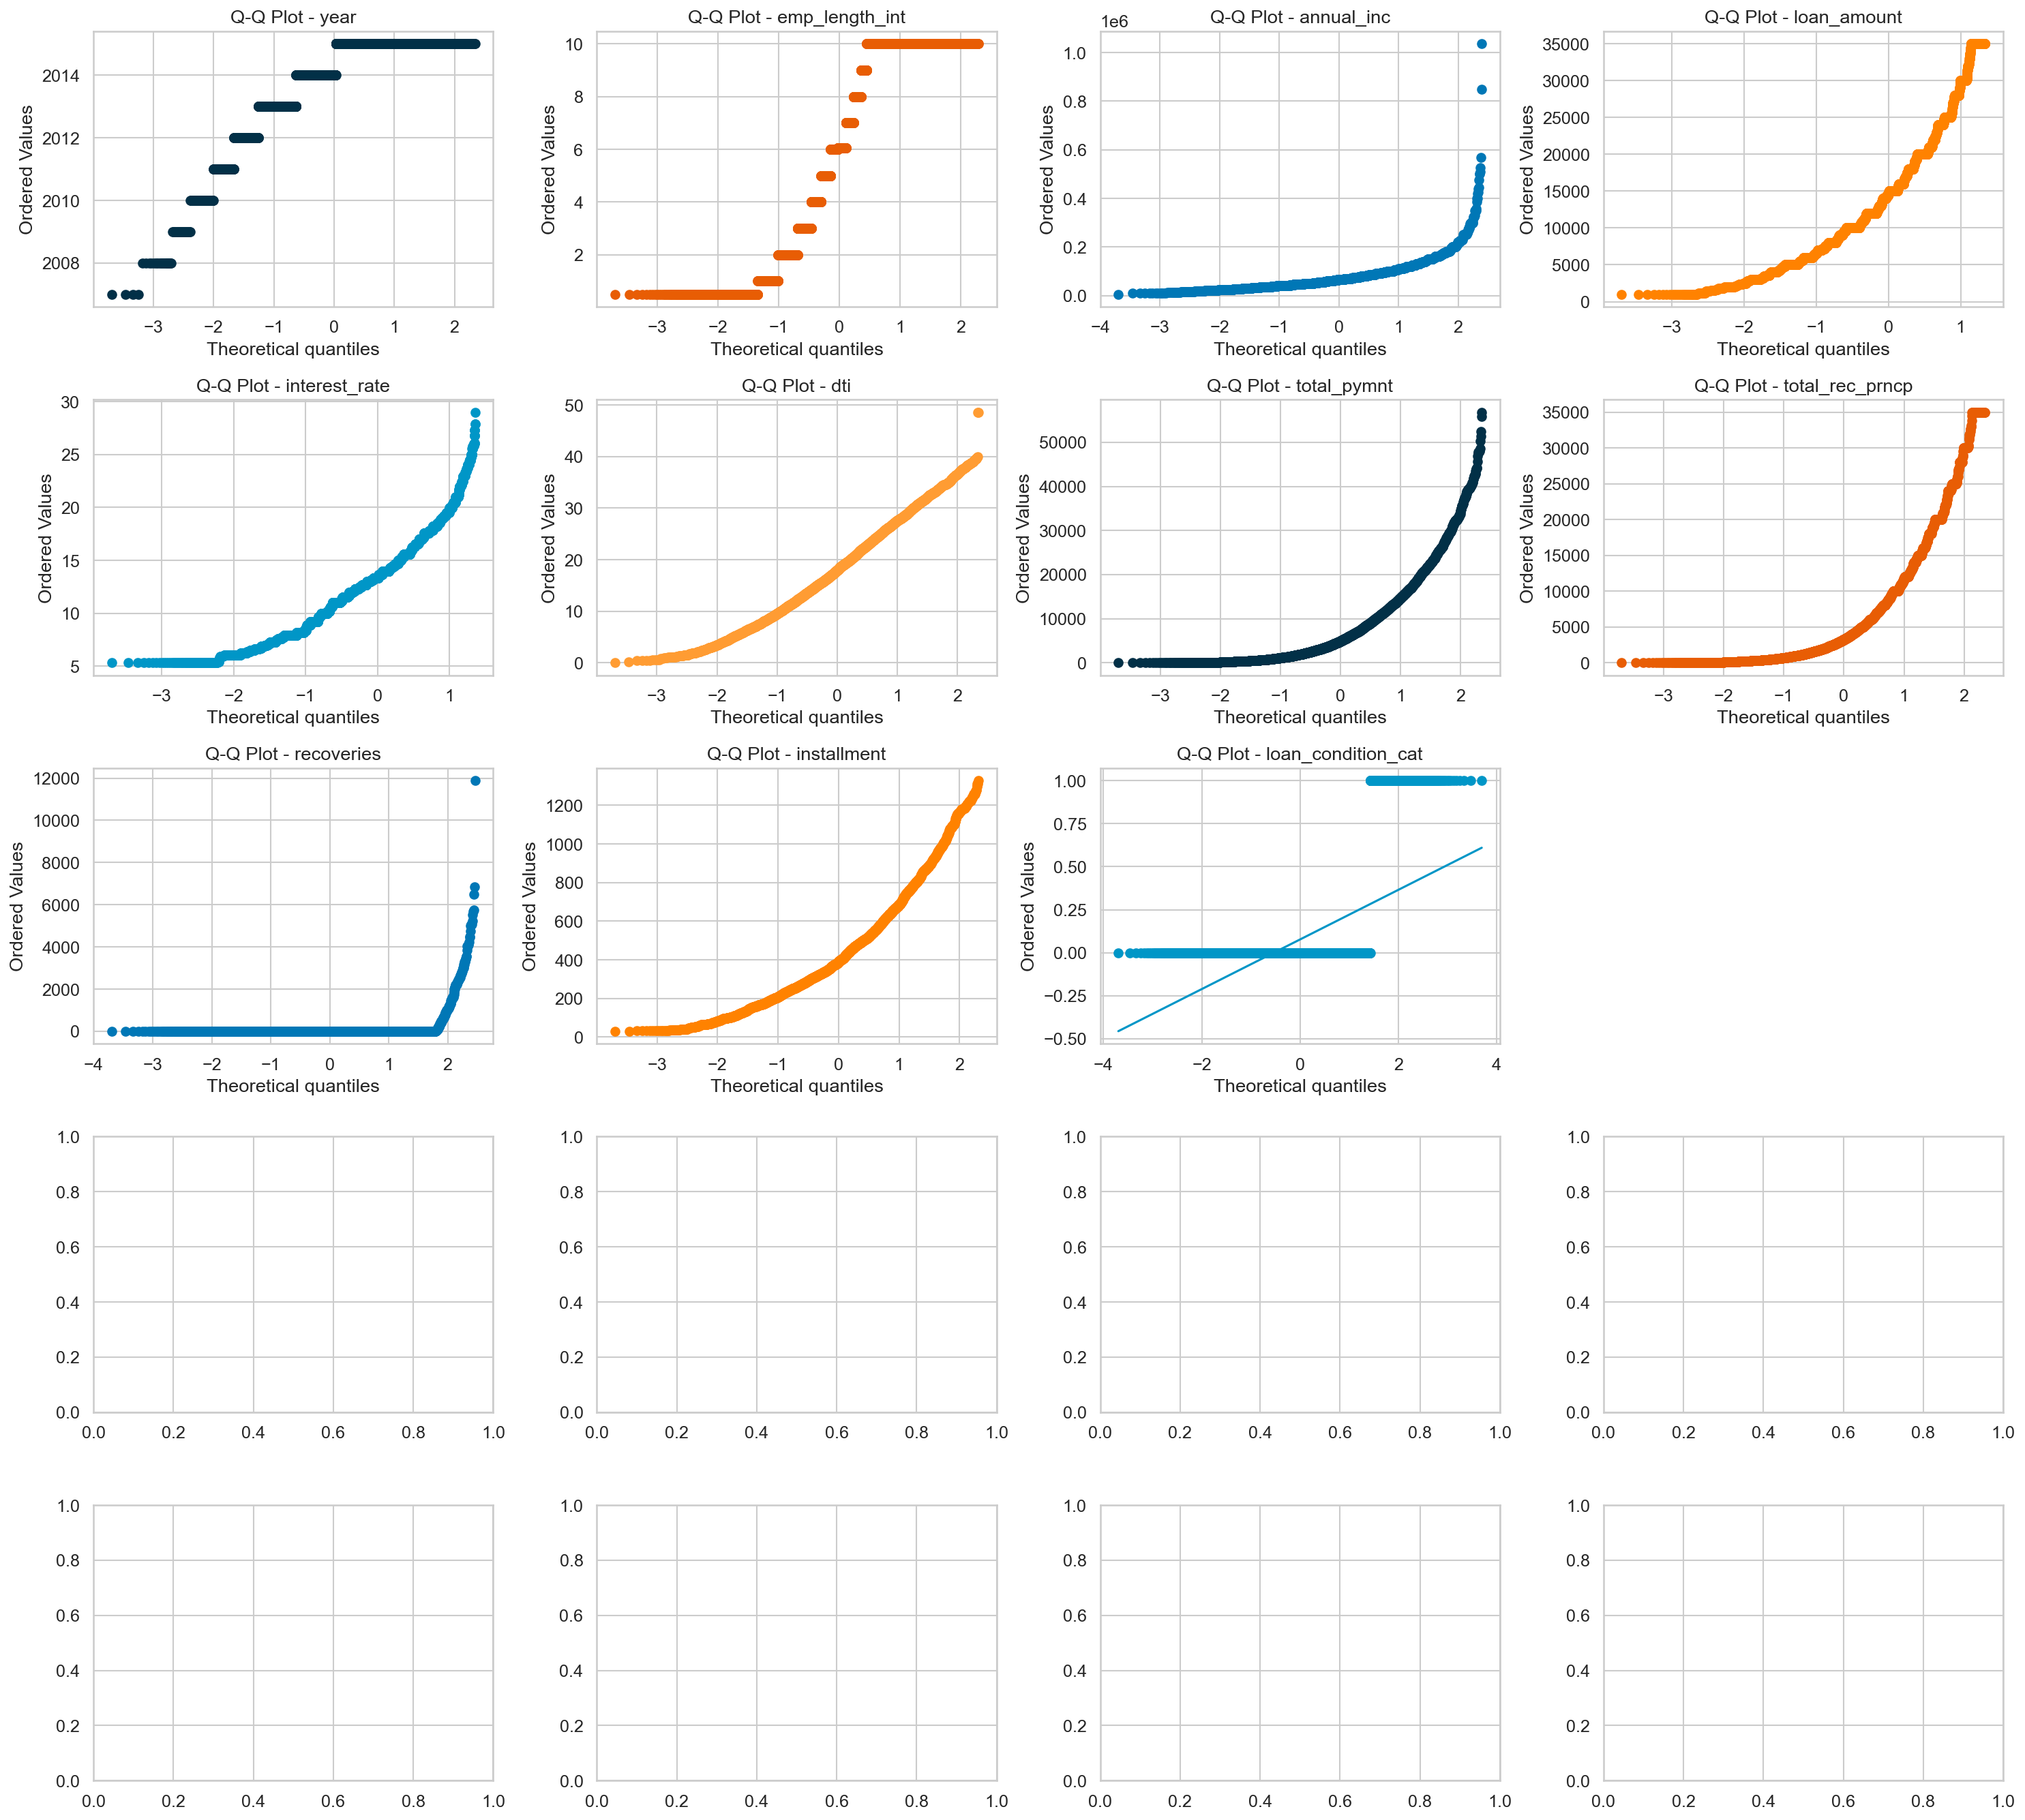

In [19]:
fig, ax = plt.subplots(5, 4, figsize=(20, 18))
ax = ax.flatten()

for i in range(len(numericas.columns)):
    stats.probplot(numericas[numericas.columns[i]], dist="norm", plot=ax[i])

    for line in ax[i].get_lines():
        line.set_color(color_palette[i % len(color_palette)])

    ax[i].set_title(f"Q-Q Plot - {numericas.columns[i]}")

fig.delaxes(ax[len(numericas.columns)])

plt.tight_layout()
plt.show()

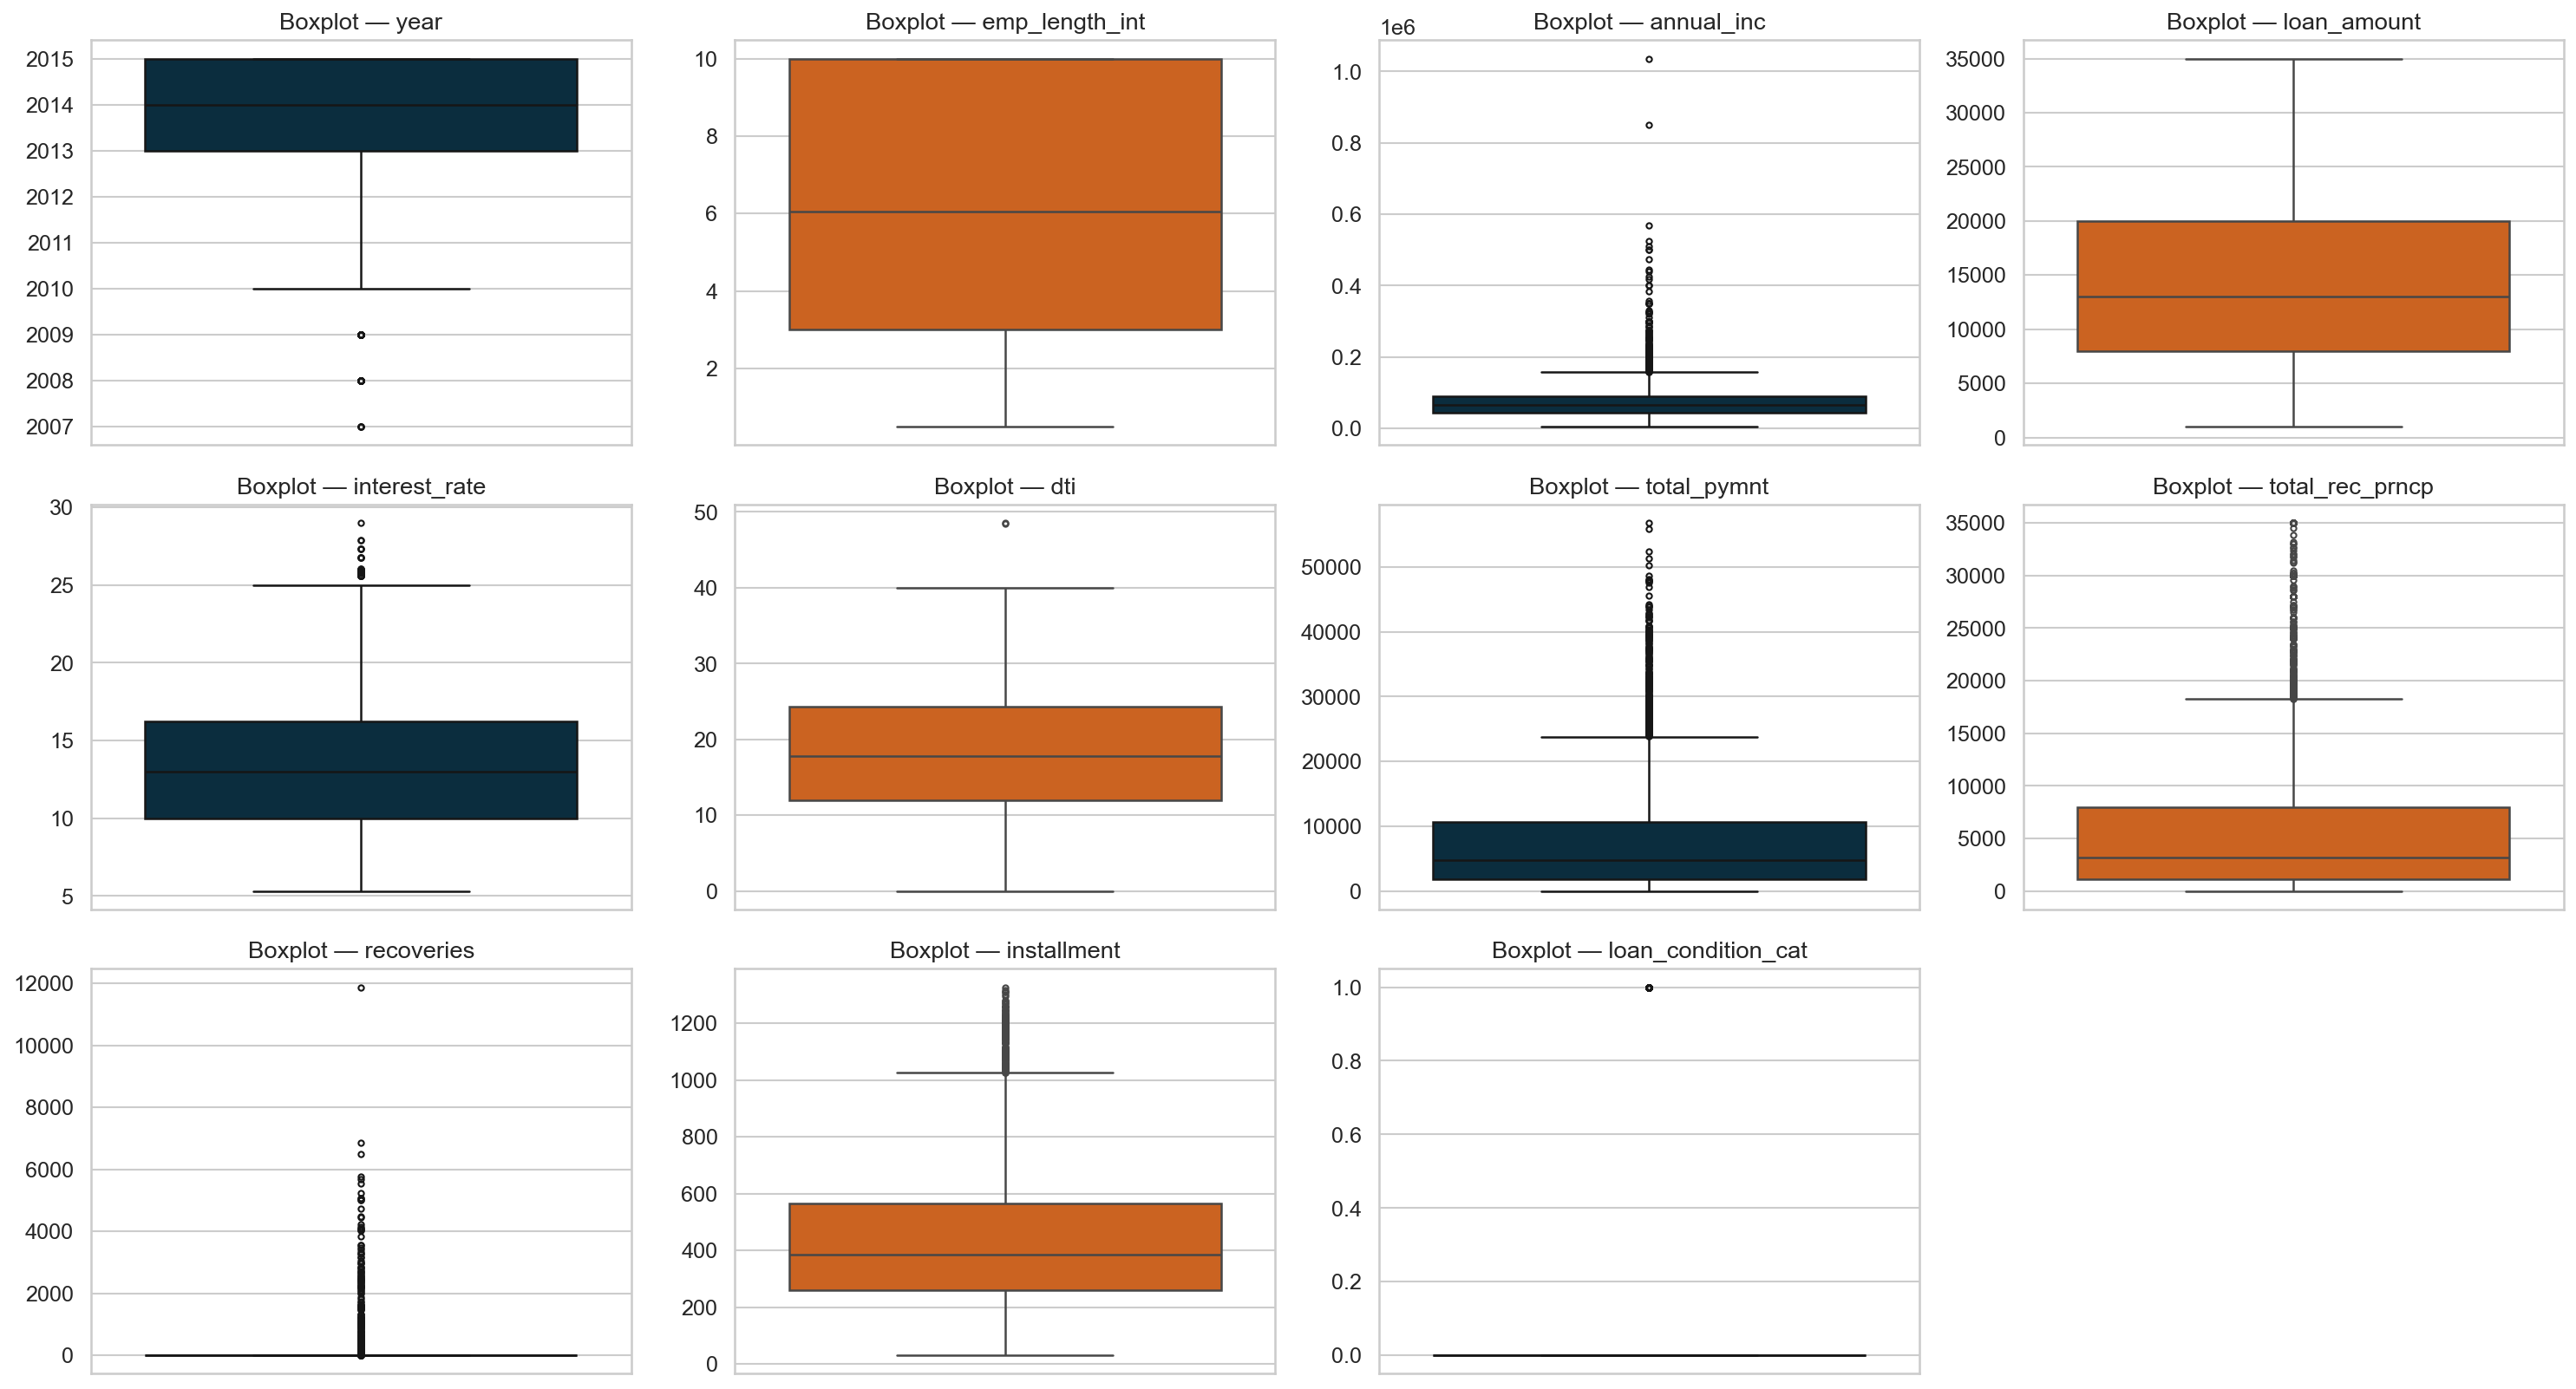

In [20]:
fig, ax = plt.subplots(5, 4, figsize=(20, 18))
ax = ax.flatten()

for i, col in enumerate(numericas.columns):

    sns.boxplot(
        y=numericas[col],
        ax=ax[i],
        color=color_palette[i % 2],   
        fliersize=3,
        linewidth=1.2
    )

    ax[i].set_title(f"Boxplot — {col}")
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")

for j in range(len(numericas.columns), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

A análise das distribuições foi realizada por meio de histogramas, Q-Q plots e boxplots. Verificou-se que nenhuma das variáveis numéricas segue distribuição normal. A maioria apresenta assimetria positiva acentuada. O Q-Q plot confirma a ausência de alinhamento com a distribuição normal teórica, reforçando a não-normalidade. Os boxplots também evidenciam distribuições assimétricas, coerentes com os demais gráficos exploratórios

In [21]:
numericas.corr()

,year,emp_length_int,annual_inc,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,loan_condition_cat
year,1.000000,0.047567,0.035354,0.088651,-0.077137,0.151880,-0.487479,-0.465185,-0.108024,0.057120,-0.163988
emp_length_int,0.047567,1.000000,0.083143,0.126041,0.014417,0.048554,0.060138,0.044022,0.014326,0.110970,-0.011712
annual_inc,0.035354,0.083143,1.000000,0.461752,-0.106919,-0.208861,0.231255,0.213147,0.030577,0.448130,-0.058270
loan_amount,0.088651,0.126041,0.461752,1.000000,0.131596,0.050571,0.476430,0.393034,0.099584,0.944838,-0.000168
interest_rate,-0.077137,0.014417,-0.106919,0.131596,1.000000,0.164104,0.168777,0.054413,0.113577,0.120106,0.170568
dti,0.151880,0.048554,-0.208861,0.050571,0.164104,1.000000,-0.066642,-0.091364,0.012578,0.035028,0.016902
total_pymnt,-0.487479,0.060138,0.231255,0.476430,0.168777,-0.066642,1.000000,0.969856,0.034610,0.515372,-0.051196
total_rec_prncp,-0.465185,0.044022,0.213147,0.393034,0.054413,-0.091364,0.969856,1.000000,-0.041898,0.449929,-0.105561
recoveries,-0.108024,0.014326,0.030577,0.099584,0.113577,0.012578,0.034610,-0.041898,1.000000,0.102719,0.429987
installment,0.057120,0.110970,0.448130,0.944838,0.120106,0.035028,0.515372,0.449929,0.102719,1.000000,0.008927


In [22]:
numericas.corr()["loan_condition_cat"].drop("loan_condition_cat").sort_values(ascending=False)

recoveries         0.429987
interest_rate      0.170568
dti                0.016902
installment        0.008927
loan_amount       -0.000168
emp_length_int    -0.011712
total_pymnt       -0.051196
annual_inc        -0.058270
total_rec_prncp   -0.105561
year              -0.163988
Name: loan_condition_cat, dtype: float64

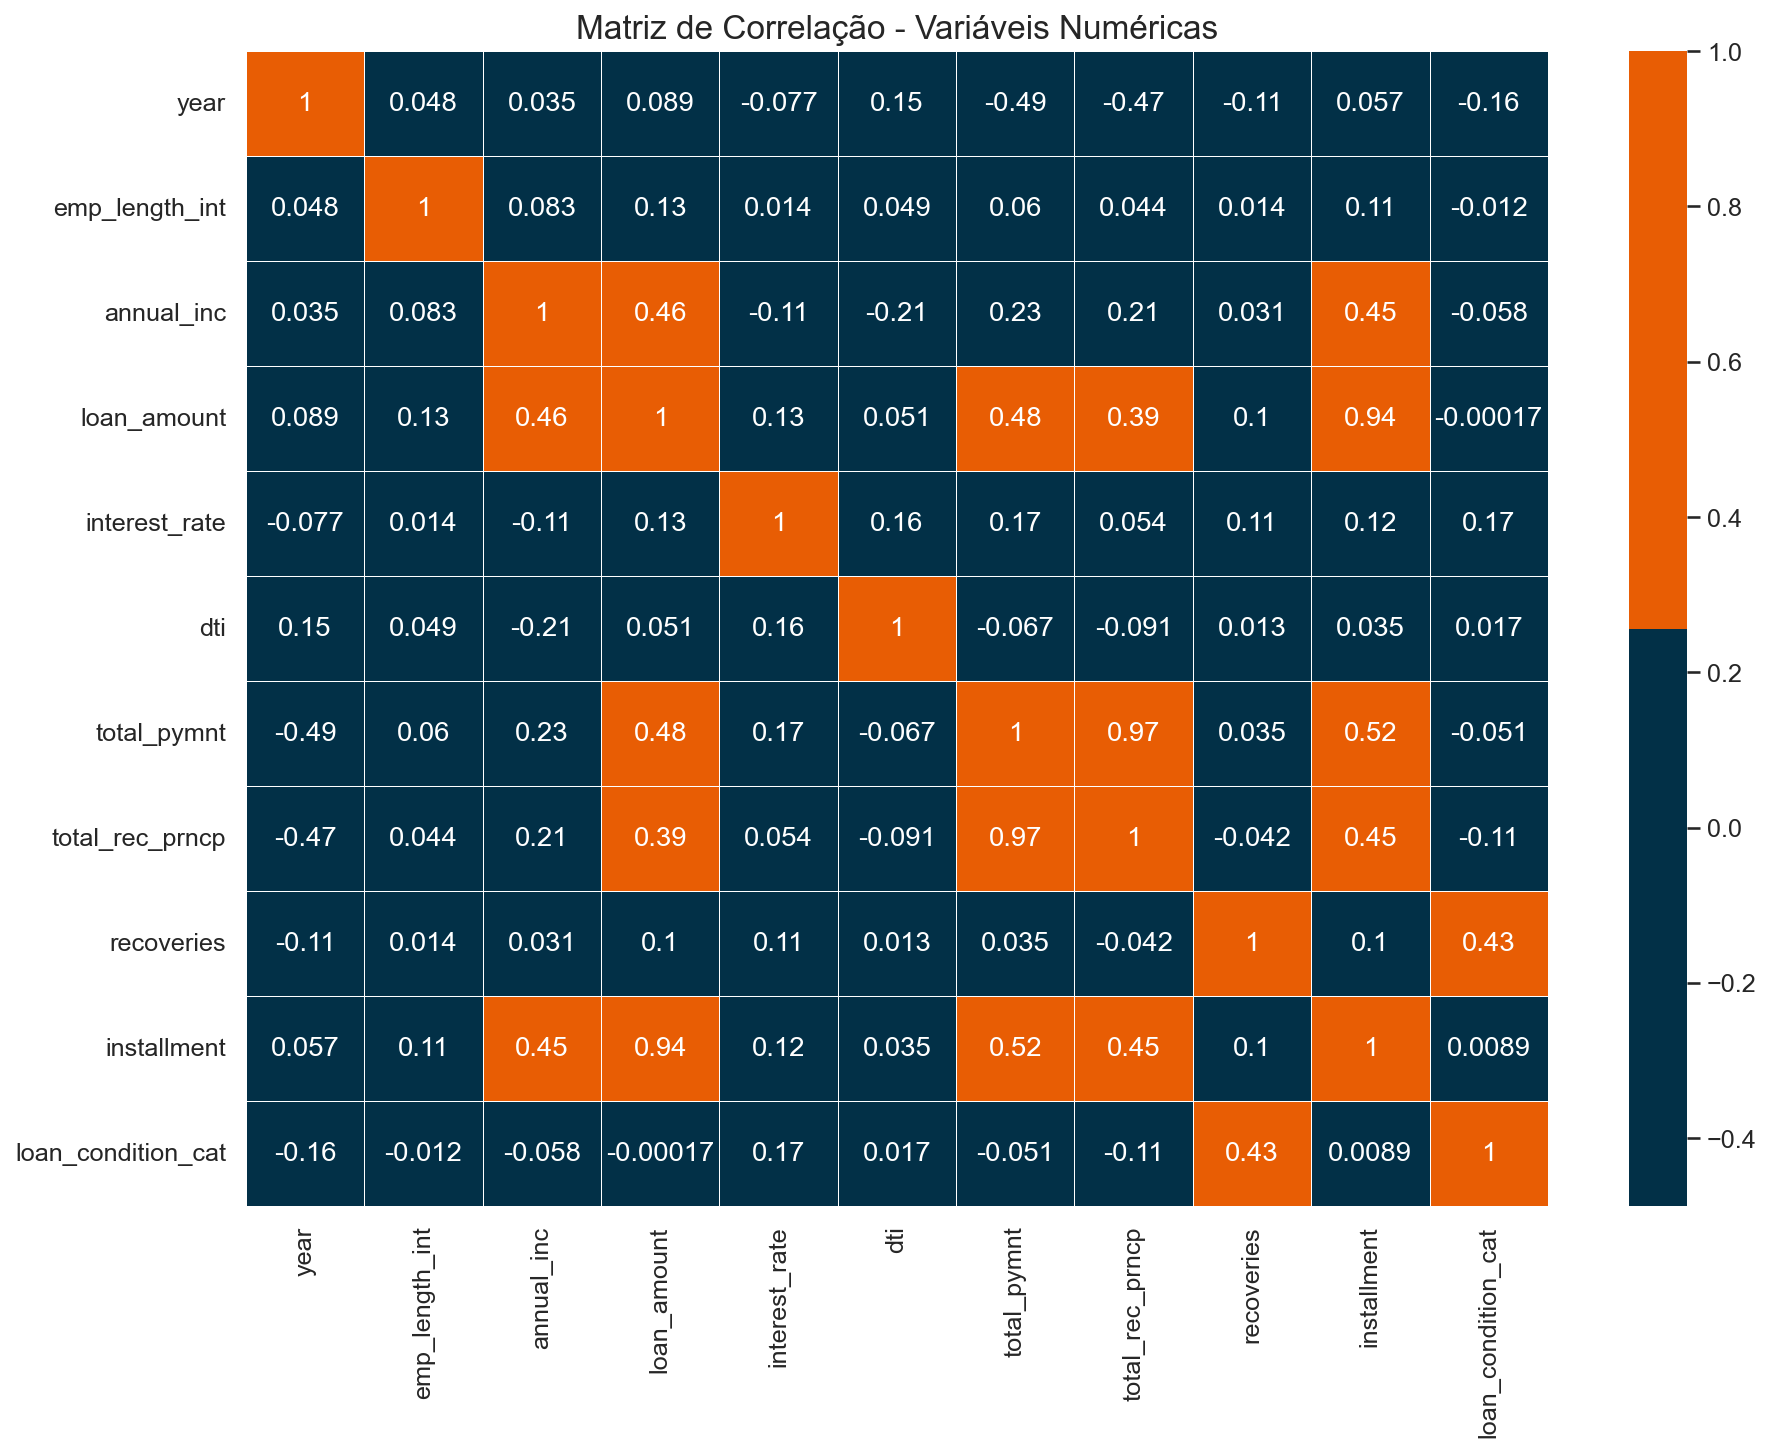

In [23]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    numericas.corr(),
    cmap=sns.color_palette([color_palette[0], color_palette[1]], as_cmap=True),
    annot=True,
    linewidths=0.3
)

plt.title("Matriz de Correlação - Variáveis Numéricas", fontsize=16)
plt.show()

A análise de correlação mostra relações esperadas entre variáveis financeiras, como loan_amount e installment ou annual_inc e income_cat. Algumas variáveis apresentam correlação muito alta (total_pymnt × total_rec_prncp, loan_amount × installment), indicando redundância que deve ser considerada na modelagem. A correlação com a variável alvo loan_condition_cat é moderada, sugerindo que nenhuma feature isolada é totalmente determinante, o que justifica o uso de modelos capazes de capturar interações entre variáveis. Além disso, correlações negativas com year indicam possível efeito temporal, que pode ser explorado com features derivadas.

### Detecção de Outliers com Isolation Forest

Para uma detecção robusta e multivariada de outliers, vamos utilizar o algoritmo **Isolation Forest**, que é uma técnica baseada em árvores de decisão que isola observações incomuns com base em sua raridade estatística. Essa abordagem é eficaz em datasets com alta dimensionalidade e distribuições não normais.

Utilizamos a variavél numerica sem valores ausentes para treinar o modelo, e definimos uma contaminação de 5% para estimar a proporção de outliers no conjunto de dados.

In [24]:
numericas.dropna(inplace=True)

In [25]:
colunas_descartar = [col for col in numericas.columns if col.endswith("_d")]
numericas = numericas.drop(columns=colunas_descartar)

categoricas = [col for col in numericas.columns if "_cat" in col]
continuas = [col for col in numericas.columns if col not in categoricas]

if "outlier" in continuas:
    continuas.remove("outlier")

isoforest = IsolationForest(
    contamination=0.05,
    random_state=42
)

outlier_labels = isoforest.fit_predict(numericas[continuas])

numericas["outlier"] = outlier_labels

outliers = numericas[numericas["outlier"] == -1]
normais = numericas[numericas["outlier"] == 1]

rare_threshold = 0.01
categorias_raras = {}

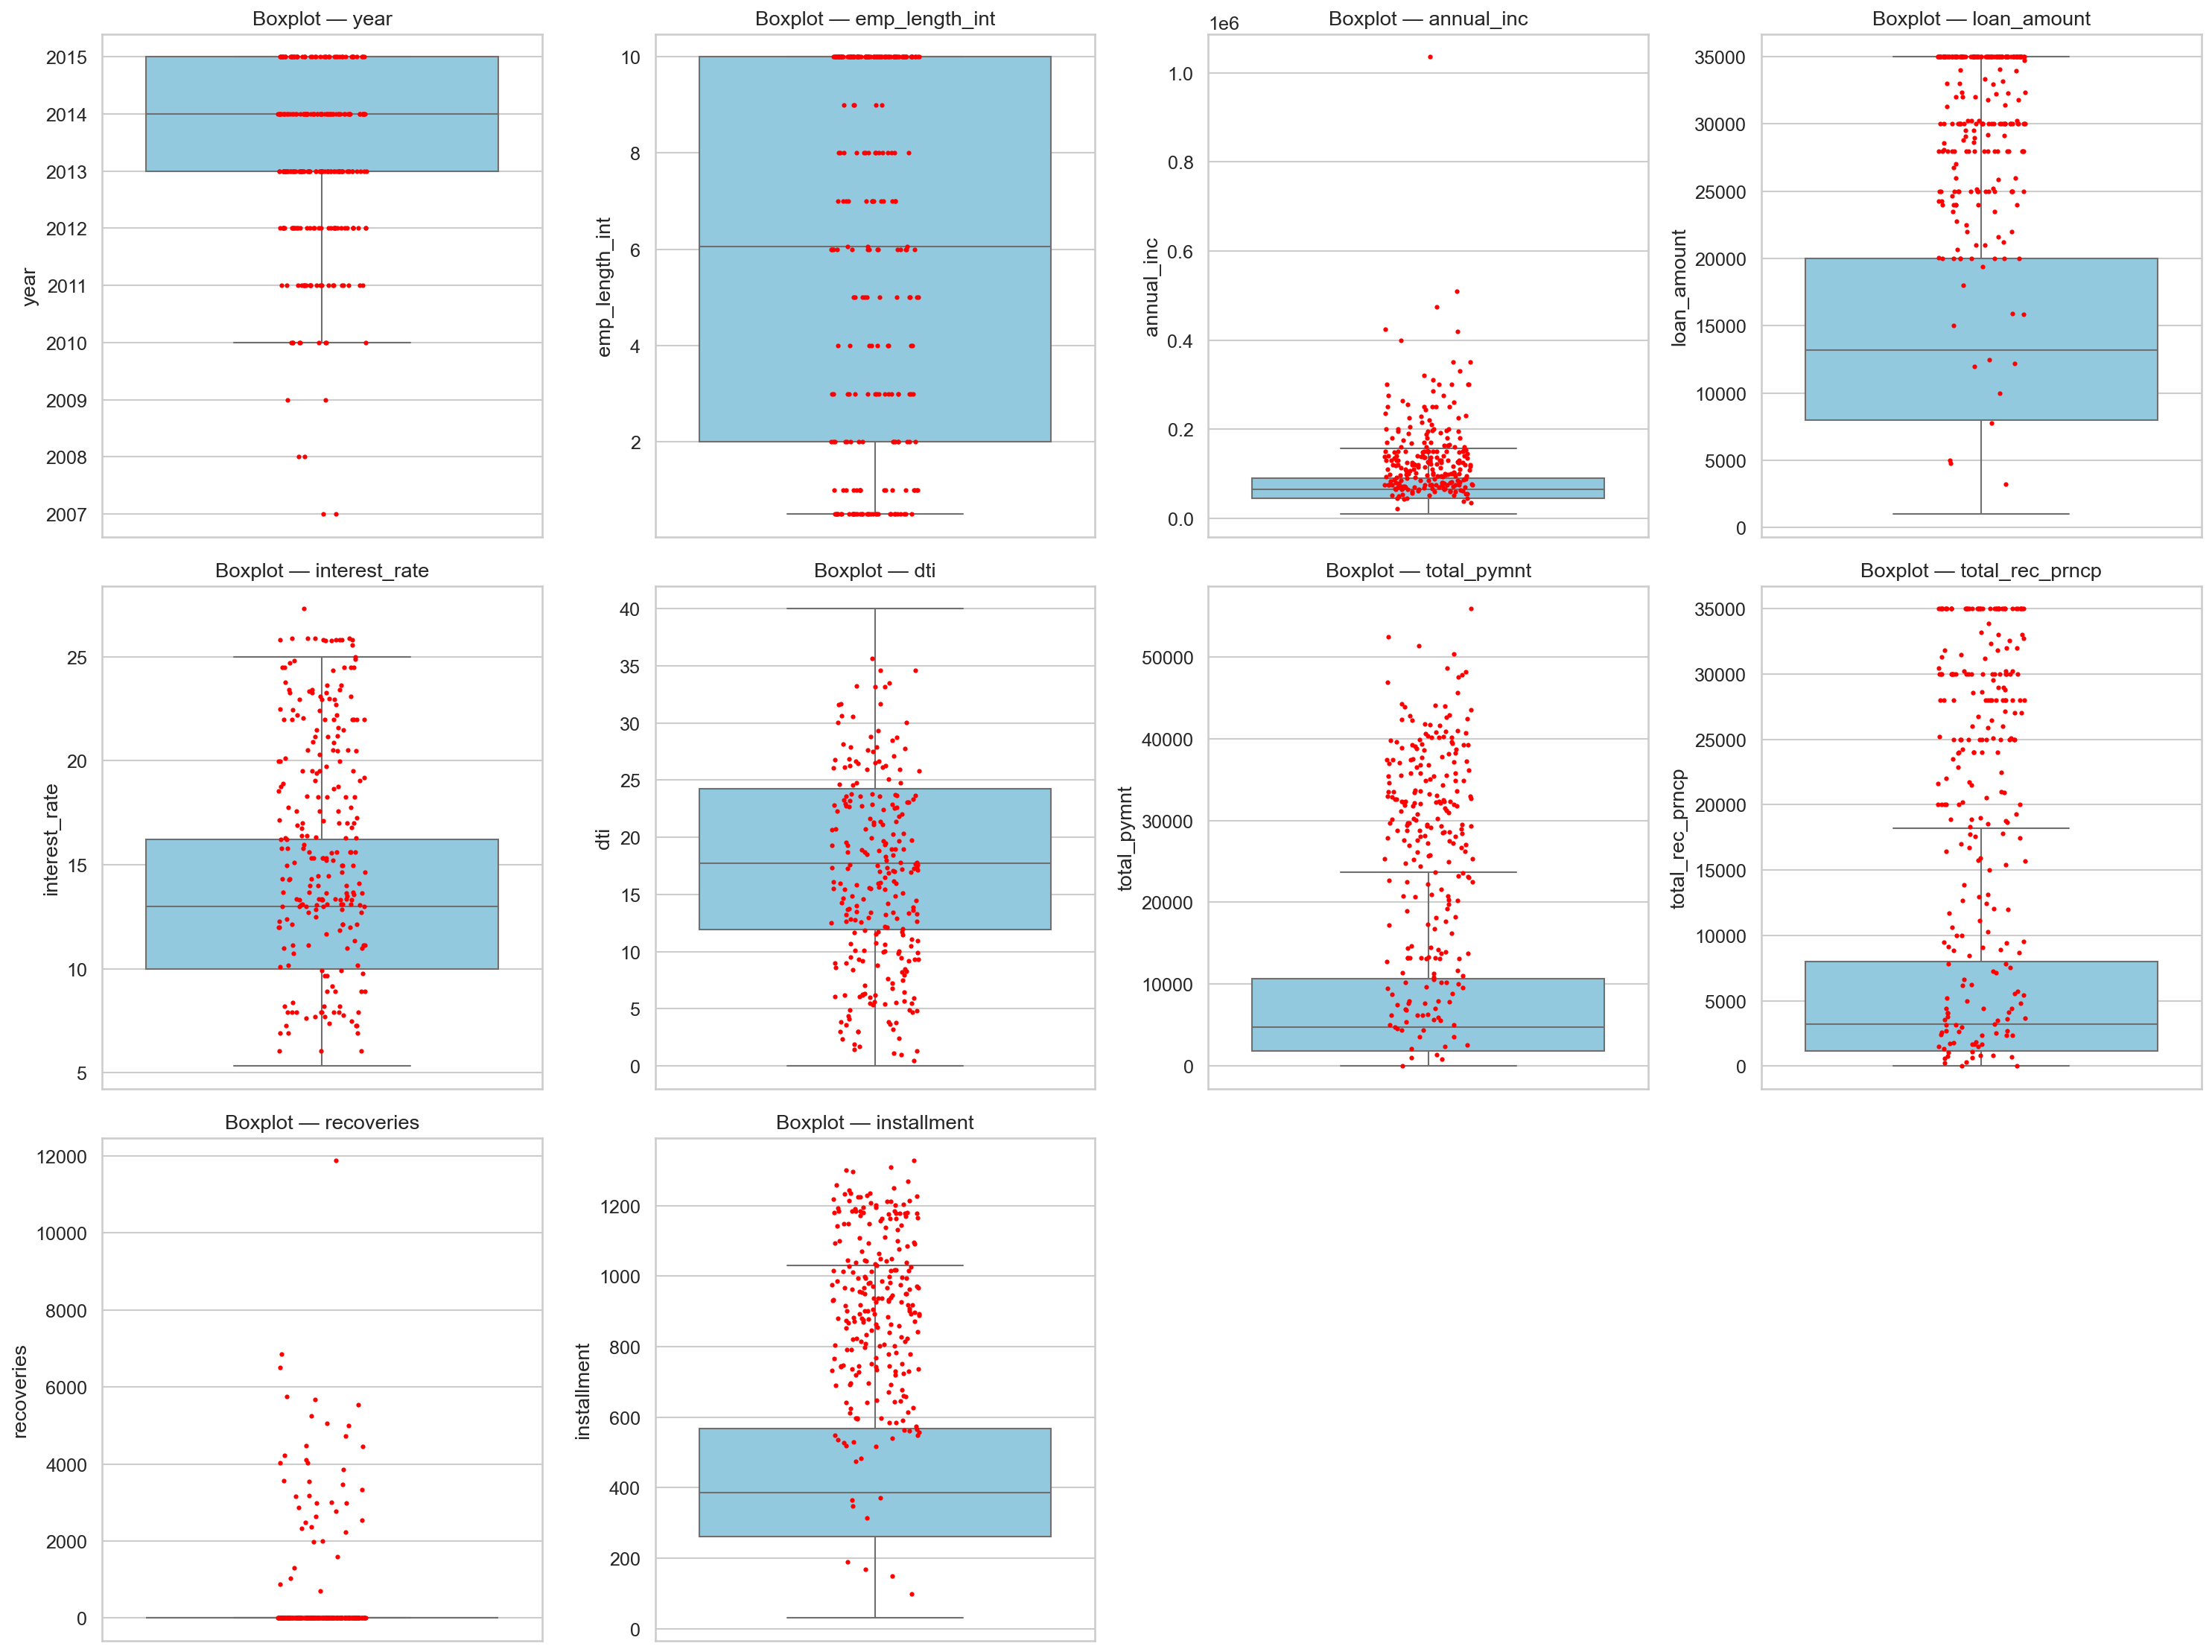

In [26]:
for col in categoricas:
    freq = numericas[col].value_counts(normalize=True)
    raras = freq[freq < rare_threshold].index.tolist()
    categorias_raras[col] = raras

cols_plot = continuas
n_cols = 4
n_rows = (len(cols_plot) + n_cols - 1) // n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
ax = ax.flatten()

for i, col in enumerate(cols_plot):
    sns.boxplot(y=numericas[col], ax=ax[i], color='skyblue', showfliers=False)
    sns.stripplot(y=outliers[col], ax=ax[i], color='red', size=3, jitter=True)
    ax[i].set_title(f'Boxplot — {col}')
    if ax[i].get_legend():
        ax[i].get_legend().remove()

for j in range(len(cols_plot), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


A análise dos boxplots mostra que várias variáveis financeiras possuem grande variação e alguns valores bem acima do normal, representados pelos pontos vermelhos detectados como possíveis outliers. Variáveis como annual_inc, total_pymnt, total_rec_prncp e recoveries têm valores muito altos em poucos casos, enquanto interest_rate, loan_amount, installment e dti são mais estáveis, mas ainda apresentam pontos fora do padrão. A variável year é a mais regular, sem variações inesperadas. Mesmo com esses valores extremos, eles estão mantidos no conjunto de dados para não perder informações importantes sobre o comportamento real dos empréstimos.

Para melhorar a interpretação gráfica dos outliers detectados pelo Isolation Forest, aplicamos a técnica de Análise de Componentes Principais (PCA), reduzindo a dimensionalidade dos dados contínuos para apenas duas componentes principais. Esse procedimento permite projetar informações multidimensionais em um plano bidimensional, preservando ao máximo a variabilidade relevante e facilitando a distinção visual entre pontos normais e anômalos. Assim, após padronizar as variáveis numéricas, o PCA foi utilizado para gerar uma visualização clara, onde a dispersão dos dados e a separação dos outliers se tornam mais evidentes em um gráfico 2D.

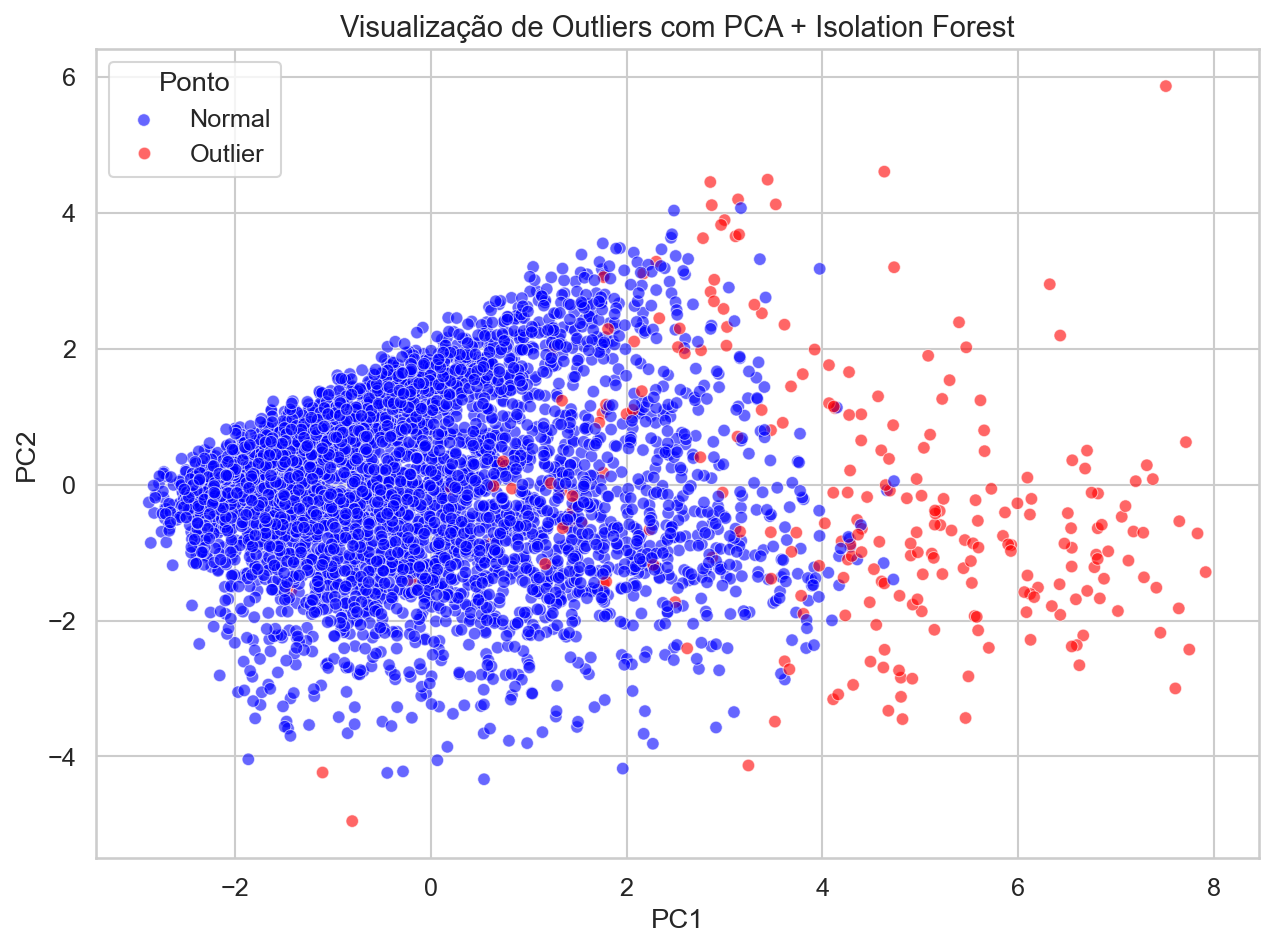

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
num_scaled = scaler.fit_transform(numericas[continuas])

# 2. Aplicar PCA para reduzir para 2 componentes
pca = PCA(n_components=2, random_state=42)
pca_comps = pca.fit_transform(num_scaled)

# 3. Criar um dataframe com as componentes + outliers
pca_df = pd.DataFrame({
    "PC1": pca_comps[:, 0],
    "PC2": pca_comps[:, 1],
    "outlier": numericas["outlier"]
})

# 4. Plot 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="outlier",
    palette={1: "blue", -1: "red"},
    alpha=0.6,
)
plt.title("Visualização de Outliers com PCA + Isolation Forest", fontsize=14)
plt.legend(title="Ponto", labels=["Normal", "Outlier"])
plt.show()

O gráfico mostra os dados convertidos para duas dimensões usando PCA, e cada ponto representa um registro do conjunto de dados. Os pontos azuis são valores normais e os vermelhos são outliers detectados pelo Isolation Forest. Podemos ver que os pontos azuis ficam mais agrupados no centro, indicando que eles seguem um padrão comum. Já os pontos vermelhos aparecem mais espalhados e afastados desse grupo, o que mostra que eles têm comportamentos diferentes do restante e, por isso, foram marcados como anomalias.